# Trabajo Practico Matematica III #

## Analisis de datos ##

La idea de este trabajo practico es el analisis de datos del siguiente archivo con formato .csv  -> **`corredores.csv`**.  

El nombre original del archivo era **`categorías de corredores.csv`** pero fue cambiado para acomodarse con la tarea en cuestion.  

Antes de iniciar con todo el analisis, es necesario importar todos los modulos necesarios para el trabajo.  

*tambien se desactivaron los warnings, de todas formas en los momentos en los que llegue a ocurrir algo indeceado será mencionado*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.impute import SimpleImputer
import seaborn as sns
from module import dataFrameFunctions as dff
import warnings
%matplotlib inline
#warnings.filterwarnings(action='ignore')

Procedemos a incorporar en el proyecto un *dataFrame* de los corredores y visualizamos los primeros 5 elementos, solamente para ver como se ve el *dataFrame*

In [2]:
dfCorredores = pd.read_csv('corredores.csv')
dfCorredores

,Unnamed: 0,place,gender,age,home,time,Velocidad
0,3475,3592,Male,52,GBR,217.483333,Regular
1,13594,13853,Female,40,NY,272.550000,Regular
2,12012,12256,Male,31,FRA,265.283333,Regular
3,10236,10457,Female,33,MI,256.150000,Regular
4,9476,9686,Male,33,NY,252.250000,Regular
...,...,...,...,...,...,...,...
995,15972,16261,Male,61,FRA,285.883333,Regular
996,1090,1131,Male,37,GBR,191.916667,Veloz
997,16419,16713,Female,53,IRL,289.016667,Regular
998,13977,14241,Female,21,NY,276.050000,Regular


Vemos que hay una columna sin nombre. Para solucionar esto cambiaremos el nombre y haremos algunas modificaciones para mejorar la prolijidad y presentación

In [3]:
dfCorredores.rename(columns={
    'Unnamed: 0':'ID',
    'place':'Place',
    'gender':'Gender',
    'age':'Age',
    'home':'Home',
    'time':'Time',
    'Velocidad':'Velocity'},
    inplace=True)

Una vez hecho esto, lo que haremos es hacer un display de los primeros y ultimos 15 corredores, para poder tener una vision general de los datos

In [4]:
dfCorredores.head(n=15)

,ID,Place,Gender,Age,Home,Time,Velocity
0,3475,3592,Male,52,GBR,217.483333,Regular
1,13594,13853,Female,40,NY,272.550000,Regular
2,12012,12256,Male,31,FRA,265.283333,Regular
3,10236,10457,Female,33,MI,256.150000,Regular
4,9476,9686,Male,33,NY,252.250000,Regular
5,1720,1784,Male,40,NJ,201.966667,Regular
6,15736,16020,Female,30,CA,283.566667,Regular
7,10580,10805,Male,27,GBR,255.883333,Regular
8,11957,12201,Male,42,NED,264.250000,Regular
9,18933,19266,Male,48,B.C,306.683333,Lento


In [5]:
dfCorredores.tail(n=15)

,ID,Place,Gender,Age,Home,Time,Velocity
985,20530,20877,Male,29,SUI,324.666667,Lento
986,13981,14245,Male,40,MA,273.700000,Regular
987,13190,13446,Female,37,IN,267.633333,Regular
988,1038,1079,Male,40,NED,191.316667,Veloz
989,13752,14013,Male,49,ITA,273.033333,Regular
990,23273,23645,Female,46,NY,501.550000,Lento
991,15901,16189,Female,51,TN,285.350000,Regular
992,14889,15162,Female,50,GER,278.116667,Regular
993,11547,11784,Female,40,NY,263.383333,Regular
994,4079,4206,Male,27,CAN,223.333333,Regular


## Analisis de las columnas

- ID - id del corredor
- Place - posicion del corredor
- Gender - genero del corredor
- Age - edad del corredor
- Home - pais del corredor
- Time - tiempo total en completar la carrera
- Velocity - velocidad en la que fueron

Una cosa que se ve es que la velocidad del corredor es dependiente del tiempo que tardo en completar la carrera.  

- Si el corredor tuvo un **tiempo mayor o igual a 300**, es considerado **Lento**  
- Si el corredor tuvo un **tiempo mayor o igual a 200**, es considerado **Regular**  
- Si el corredor tuvo un **tiempo menor a 200**, es considerado **Veloz**

## Limpieza de datos

Vamos a eliminar los datos que cumplan el rol de numerar o de indicar un orden, este sería el ID

In [6]:
dfScrappedCorredores = dfCorredores.copy()
dfScrappedCorredores.pop('ID')
dfScrappedCorredores

,Place,Gender,Age,Home,Time,Velocity
0,3592,Male,52,GBR,217.483333,Regular
1,13853,Female,40,NY,272.550000,Regular
2,12256,Male,31,FRA,265.283333,Regular
3,10457,Female,33,MI,256.150000,Regular
4,9686,Male,33,NY,252.250000,Regular
...,...,...,...,...,...,...
995,16261,Male,61,FRA,285.883333,Regular
996,1131,Male,37,GBR,191.916667,Veloz
997,16713,Female,53,IRL,289.016667,Regular
998,14241,Female,21,NY,276.050000,Regular


## Analisis de los datos

Por lo que se puede apreciar, ahora podemos hacer, por ejemplo un describe de las columnas que presenta el *dataFrame*

### Describe()

In [7]:
dfScrappedCorredores.describe()

,Place,Age,Time
count,1000.000000,1000.000000,1000.000000
mean,11992.319000,39.100000,268.570700
std,6858.858466,10.675391,53.550743
min,54.000000,5.000000,147.333333
25%,6095.000000,31.000000,233.775000
50%,11962.000000,38.000000,262.841667
75%,17921.750000,46.000000,294.854167
max,23662.000000,81.000000,566.783333


Podemos observar Algunos datos relevantes, existe un promedio al respecto de la **edad**, la **posicion** y el **tiempo** de cada partipante.  
Respecto a la edad vemos el promedio, que es **39 años**  
Sobre el tiempo, podemos observar que el tiempo promedio de los corredores fue de **268**

### Shape

In [8]:
dfScrappedCorredores.shape

(1000, 6)

### NaN o Null

Corroboremos si es que existe algunos datos *nulos* o *NaN* en el *dataFrame*

In [9]:
dfScrappedCorredores.isnull().any()

Place       False
Gender      False
Age         False
Home         True
Time        False
Velocity    False
dtype: bool

Como existen algunos datos nulos vamos a proceder a sacarlos de la lista

In [10]:

dfScrappedCorredores = dfScrappedCorredores.dropna(axis=0,how='any')
dfScrappedCorredores

,Place,Gender,Age,Home,Time,Velocity
0,3592,Male,52,GBR,217.483333,Regular
1,13853,Female,40,NY,272.550000,Regular
2,12256,Male,31,FRA,265.283333,Regular
3,10457,Female,33,MI,256.150000,Regular
4,9686,Male,33,NY,252.250000,Regular
...,...,...,...,...,...,...
995,16261,Male,61,FRA,285.883333,Regular
996,1131,Male,37,GBR,191.916667,Veloz
997,16713,Female,53,IRL,289.016667,Regular
998,14241,Female,21,NY,276.050000,Regular


Corroboro que no existen datos nulos

In [11]:
dfScrappedCorredores.isnull().any()

Place       False
Gender      False
Age         False
Home        False
Time        False
Velocity    False
dtype: bool

# Analisis en Pandas

Antes de llegar a hacer un analisis utilizando librerias como skylearn, vamos a trabajar con lo que ya tenemos.

## Vista previa antes prediccion de datos

Ahora vamos a hacer un avistamientos de estos datos extrallendo cosas que nos resulten interesantes

### Cantidad de competidores segun su velocidad

Tomaremos la cantidad de competidores segun la velocidad a la que fueron clasificadas en la carrera

In [12]:
"""
Utilizaremos un modulo llamado Modules.
Esta es un modulo personalizado para tomar funciones directamente de sus paquetes
El que utilizaremos se llama dataFrameFunctions que tiene funciones que se aplican directamente a una serie o un dataFrame
---------------------------------------------------------------------------------------------------------------------------
Ahora, la funcion que usaremos se llama countValuesInSerie, que nos devolvera la cantidad de elementos de una serie
tomando en cuenta las veces que aparesca en la serie.
Ya la fución se encuentra documentada, si desea corroborar al contenido puede entrar directamente al documento en cuestion
---------------------------------------------------------------------------------------------------------------------------
Tomaremos la cantidad de corredores dependiendo de si fueron veloces, lentos o regulares
"""
corredoresVeloces = dff.countValuesInSerie(serie= dfCorredores.Velocity,dataInSerie='Veloz')
corredoresLentos = dff.countValuesInSerie(serie= dfCorredores.Velocity,dataInSerie='Lento')
corredoresRegulares = dff.countValuesInSerie(serie= dfCorredores.Velocity,dataInSerie='Regular')

"""
Acá estoy colocando estos datos en un array de numpy. 
Esto lo vamos a usar mas adelante
lo definimos de tipo int16 porque el tamaño de los datos no son muy grandes, podemos permitirlo
"""
cantCorredoresVelocidad = np.array([corredoresVeloces,corredoresRegulares,corredoresLentos], dtype='int16')
cantCorredoresVelocidad

array([ 68, 719, 213], dtype=int16)

Como podemos ver, tenemos los datos de la cantidad de corredores separados por su categoria de velocidad.  
Veamoslo esto en un grafico.

In [13]:
dfcantCorredoresVelocidad = pd.DataFrame(data=cantCorredoresVelocidad,index=['Veloz','Regular','Lento'],columns=['Categoria de Corredores'])
dfcantCorredoresVelocidad

,Categoria de Corredores
Veloz,68
Regular,719
Lento,213


<AxesSubplot: >

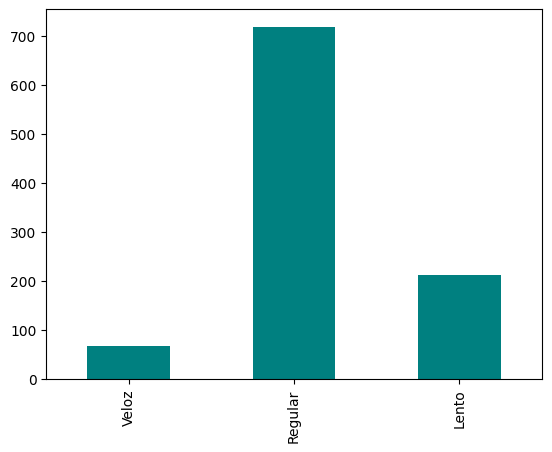

In [14]:
dfcantCorredoresVelocidad.plot.bar(color='teal',legend=False)

### Clasificacion de paises segun la cantidad de corredores ###

Tomando solamente el "Hogar" de cada corredor podemos determinar a travez del metodo `value_counts()` podemos acceder a una serie de pandas que nos indica la cantidad de corredores de cada pais, tomando como index los paises y su data la cantidad de apariciones que tiene.

In [15]:
dfScrappedCorredores['Home'].value_counts()

NY     284
GBR     87
FRA     71
NJ      61
ITA     52
      ... 
ME       1
B.C      1
ID       1
KOR      1
IN       1
Name: Home, Length: 72, dtype: int64

A travez de esto podemos ver la cantidad de paises que participaron en el evento.

In [16]:
dfScrappedCorredores['Home'].value_counts().size

72

Podemos ver que participaron 72 paises, siendo el pais con mayor cantidad de participantes Nueva York.  
Veamoslo en un grafico de barra.

<AxesSubplot: xlabel='Paises', ylabel='Corredores por pais'>

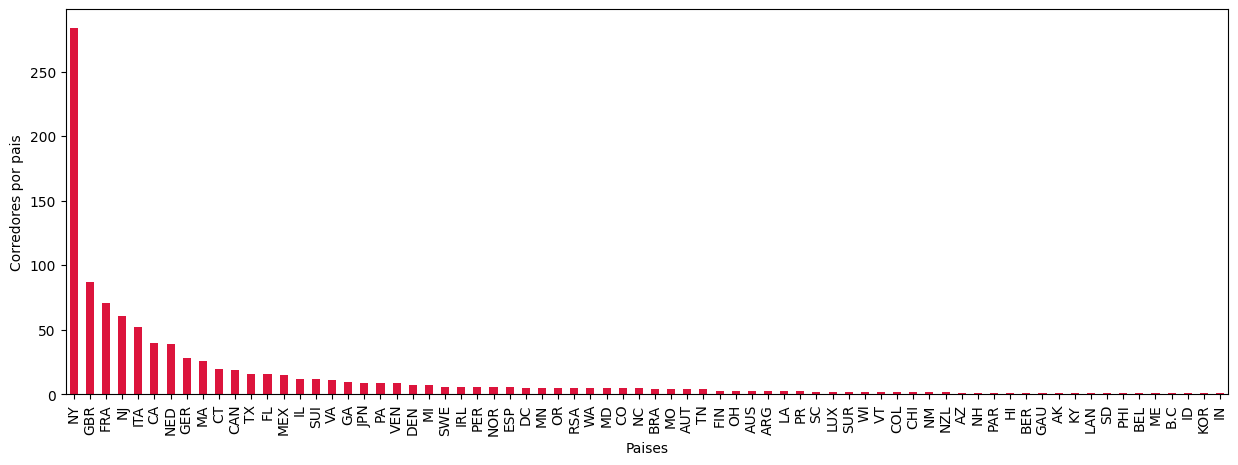

In [571]:
dfScrappedCorredores['Home'].value_counts().plot.bar(
    color='crimson',
    legend=False, 
    figsize=(15,5),
    xlabel='Paises', 
    ylabel='Corredores por pais')

Como vemos, en el evento la mayor cantidad de corredores vienen de Nueva York. Ademas, no solo tenemos eso, sino que podemos ver que mas del 25% de los corredores son de Nueva York, siendo el total de estos 999 (1000 era el total previo, para este analisis descartamos al corredor que no indicaba su "Hogar")

### Clasificacion de corredores segun su edad ###

Uno de los analisis que podemos hacer es analisar la cantidad de participantes clasificados segun su edad, con el objetivo de ver el promedio de edad de los corredores y tener una grafica de que corredores respecto a su edad.

In [572]:
"""
En este caso estamos tomando la columna 'Age', que es la columna de donde vamos a analizar la edad de los participantes.
Utilizamos el metodo 'value_counts()' para contar la cantidad de corredores de esa edad en concreto.
"""
dfScrappedCorredores['Age'].value_counts().size

56

A partir de esto podemos ver que la cantidad de edades de los competidores es de **56 años diferentes**.  


<AxesSubplot: xlabel='Corredores por edad', ylabel='Edad de los corredores'>

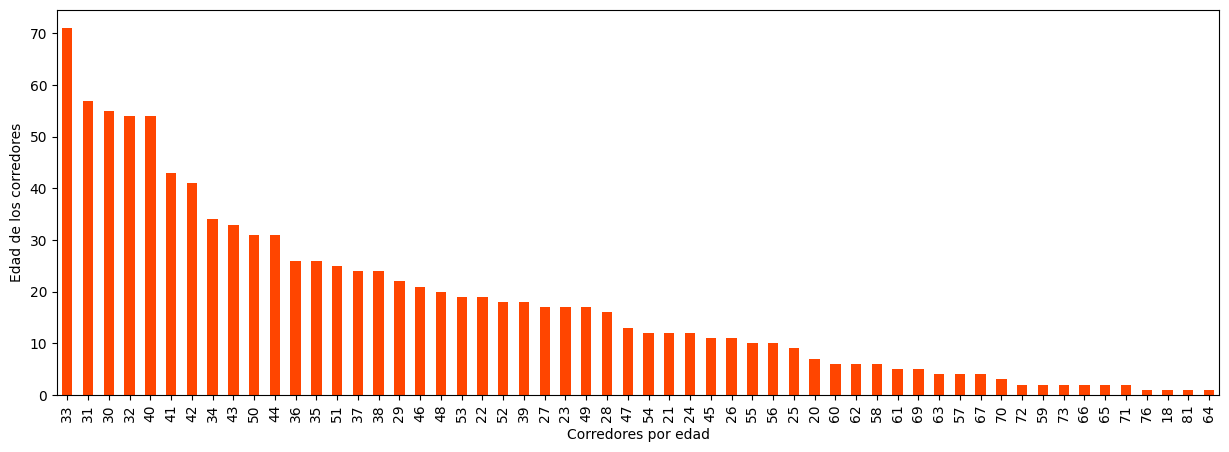

In [573]:
dfScrappedCorredores['Age'].value_counts().plot.bar(
        color='orangered',
        legend=False, 
        figsize=(15,5),
        xlabel='Corredores por edad', 
        ylabel='Edad de los corredores')

En el grafico de arriba podemos observar que la mayor cantidad de corroderes son de 33 años... Pero el grafico muestra de mayor a menos segun la cantidad de corredores respecto a la edad.  
Otra forma de verlo es si ordenamos el grafico de barras por los **corredores por edad** en lugar de la **edad de los corredores**

<AxesSubplot: xlabel='Corredores por edad', ylabel='Edad de los corredores'>

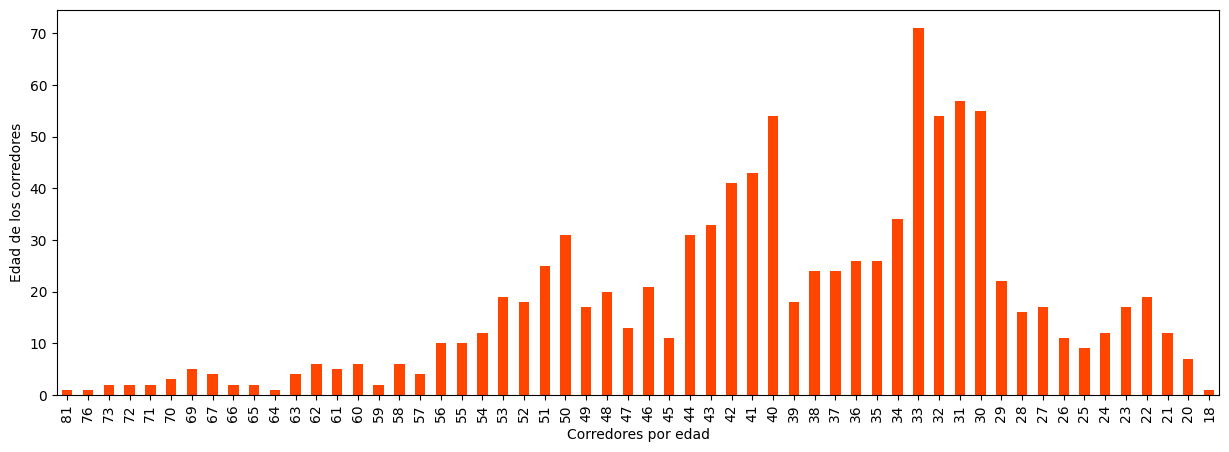

In [574]:
"""
Tambien usamos el metodo 'sort_index()' que ordena la Serie de forma decendente
"""
dfScrappedCorredores['Age'].value_counts().sort_index(ascending=False).plot.bar(
    color='orangered',
    legend=False, 
    figsize=(15,5),
    xlabel='Corredores por edad', 
    ylabel='Edad de los corredores')

Podemos ver que la mayoria de los corredores tienen una edad que ronda alrededor de los **30 a 33 años**, y tambien otro grupo mas chico entre los **40 y 42 años**. A partir de eso algunos de los grupos de corredores no son tan amplias.

### Clasificacion de corredores segun su genero ###

Una cosa que podriamos ver por ejemplo es la cantidad de participantes hombres y mujeres. Vamos a utilizar el mismo metodo que el del punto anterior.

In [575]:
dfScrappedCorredores['Gender'].value_counts()

Male      707
Female    292
Name: Gender, dtype: int64

Podemos observar que en la competición hay **707 Hombres** y **292 Mujeres**

<AxesSubplot: xlabel='Genero de los corredores', ylabel='Cantidad de corredores'>

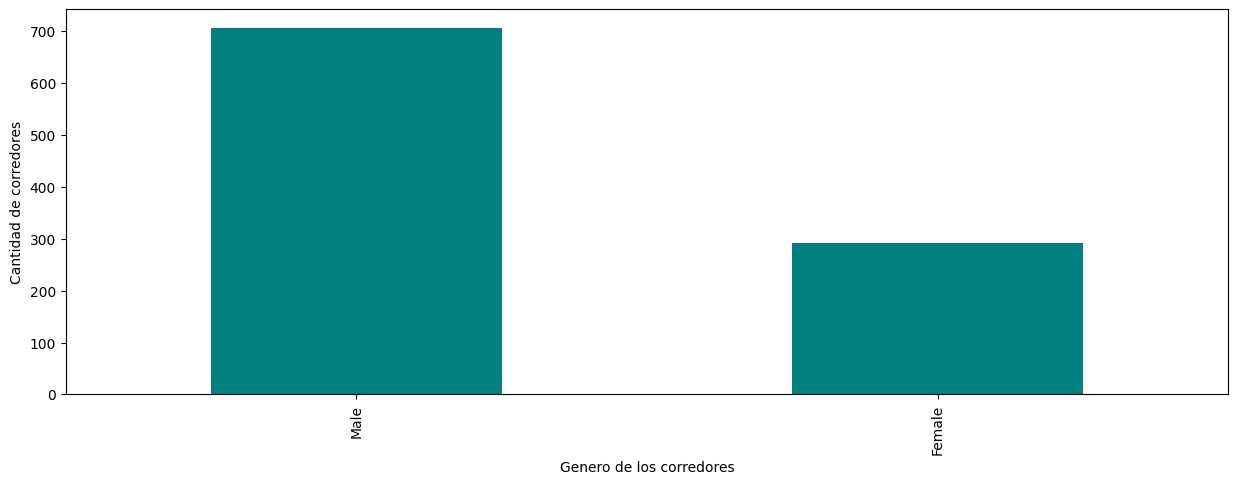

In [612]:
dfScrappedCorredores['Gender'].value_counts().plot.bar(
    color='teal',
    legend=False, 
    figsize=(15,5),
    xlabel='Genero de los corredores', 
    ylabel='Cantidad de corredores')

Podemos observar por los resultados anteriores y por este grafico de barras que hay una mayoria de hombres en este evento deportivo.

### Corredores más rapidos de cada pais###

Pudimos ver antes que Nueva York era el pais con mayor cantidad de corredores en el evento, pero ¿sera el lugar con los corredores mas rapidos?
En este caso tomamos la columna del tiempo y buscamos el tiempo mas chico, que sería por ende el corredor mas rapido.

In [613]:
dfScrappedCorredores['Time'].min()

147.3333333

El tiempo mas corto fue de **147.33**.  
Ahora con este dato buscaremos cual fue el corredor mas rapido, con sus respectivos datos.

In [614]:
dfScrappedCorredores.loc[dfScrappedCorredores['Time'] == dfScrappedCorredores['Time'].min()]

,Place,Gender,Age,Home,Time,Velocity
764,54,Male,37,AK,147.333333,Veloz


Este sería el corredor mas rapido del evento que nos figura en nuestros datos. Es un corredor de origen **AK -> Alaska**, con una edad de **37 años**

<AxesSubplot: xlabel='Paises', ylabel='Tiempo de los corredores'>

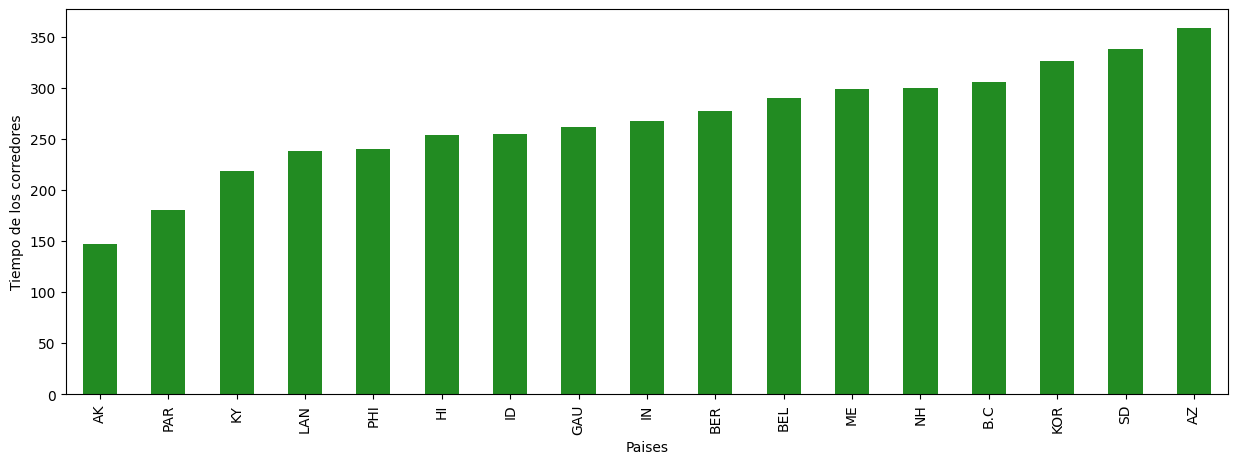

In [635]:
"""
En este caso hacemos un 'sort_values' tomando como referencia la columna de tiempo.
Copiamos el nuevo dataFrame y quitamos los duplicados de los Hogares de los corredores, quedando
unicamente los mas rapidos.
"""

dfaux = dfScrappedCorredores.sort_values(by=['Time']).copy()
dfaux.drop_duplicates(subset=["Home"], keep=False).plot.bar(
    x='Home',
    y='Time',
    color='forestgreen',
    legend=False, 
    figsize=(15,5),
    xlabel='Paises', 
    ylabel='Tiempo de los corredores')

En este caso podemos observar que estos fueron los paises con mejores tiempos en la carrera, de los cuales en ninguno de ellos encontramos a Nueva York. 

----------------------------------------------------------------------------------------------------------------------------------------------------

## Matriz de correlación  

Ahora procedamos a crear una matriz de correlación entre los datos del *dataFrame* :rage3:

In [636]:
corrCorredores = dfCorredores.corr()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_16432\4294091214.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrCorredores = dfCorredores.corr()


Corroboramos la integridad de los datos obtenidos

In [637]:
corrCorredores

,ID,Place,Age,Time
ID,1.000000,0.999997,0.146943,0.929480
Place,0.999997,1.000000,0.146799,0.929343
Age,0.146943,0.146799,1.000000,0.189867
Time,0.929480,0.929343,0.189867,1.000000


<AxesSubplot: >

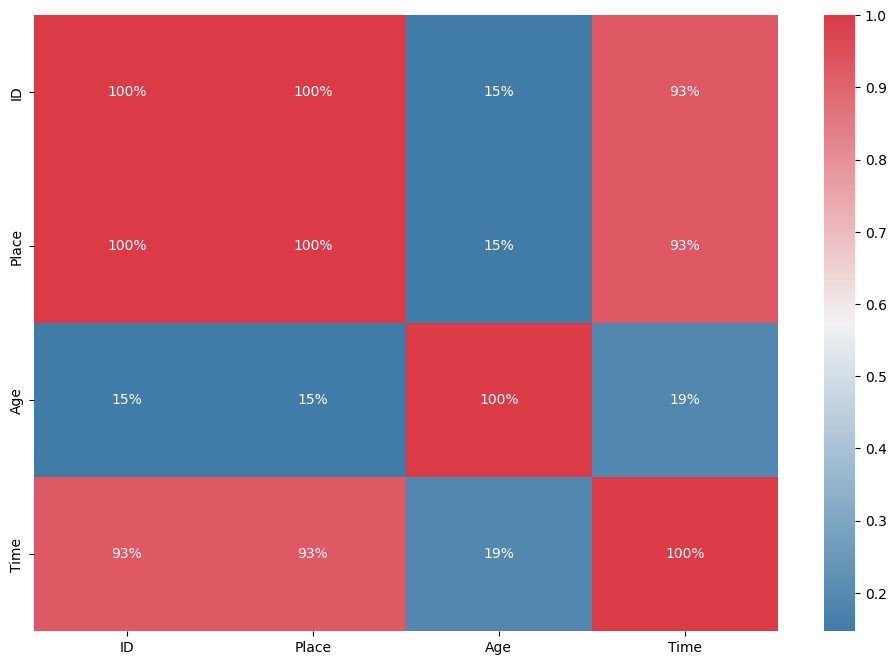

In [638]:
plt.subplots(figsize=(12,8))
sns.heatmap(corrCorredores, xticklabels=corrCorredores.columns, yticklabels=corrCorredores.columns, annot=True, fmt='.0%',
            cmap=sns.diverging_palette(240, 10, as_cmap=True)) 

Podemos observar que se perdieron algunas columnas.
Debido a esto, necesitaremos una forma de transformar los datos de estas columnas en algo manejable.  

De todas formas vale aclarar que para esto en especifico se creara una variable aparte que se usara para este caso. Hay ciertos datos de esta tabla que luego seran utilizados para analisis predictivo, por lo que no necesitaremos de este dato mas adelante.

### Matriz de correlacion - Cambio de datos del Corr

In [639]:
dfCorrCorredores = dfCorredores.copy()
dfCorrCorredores['Home']=dfCorrCorredores['Home'].astype('category').cat.codes
dfCorrCorredores['Velocity']=dfCorrCorredores['Velocity'].astype('category').cat.codes
dfCorrCorredores['Gender']=dfCorrCorredores['Gender'].astype('category').cat.codes
del dfCorrCorredores['ID']


In [640]:
dfCorrCorredores.head(15)

,Place,Gender,Age,Home,Time,Velocity
0,3592,1,52,23,217.483333,1
1,13853,0,40,50,272.550000,1
2,12256,1,31,20,265.283333,1
3,10457,0,33,41,256.150000,1
4,9686,1,33,50,252.250000,1
5,1784,1,40,47,201.966667,1
6,16020,0,30,9,283.566667,1
7,10805,1,27,23,255.883333,1
8,12201,1,42,45,264.250000,1
9,19266,1,48,5,306.683333,0


In [641]:
corrCorredores = dfCorrCorredores.corr()
corrCorredores

,Place,Gender,Age,Home,Time,Velocity
Place,1.000000,-0.220786,0.146799,0.035735,0.929343,-0.785993
Gender,-0.220786,1.000000,0.218325,-0.053148,-0.196367,0.162445
Age,0.146799,0.218325,1.000000,-0.071978,0.189867,-0.090894
Home,0.035735,-0.053148,-0.071978,1.000000,0.030243,-0.003194
Time,0.929343,-0.196367,0.189867,0.030243,1.000000,-0.813704
Velocity,-0.785993,0.162445,-0.090894,-0.003194,-0.813704,1.000000


<AxesSubplot: >

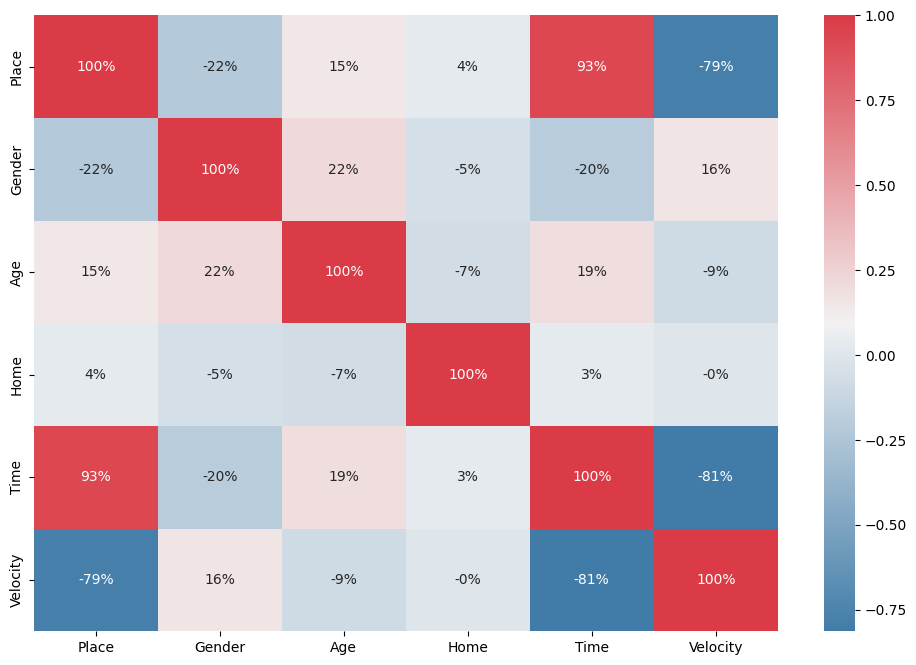

In [642]:

plt.subplots(figsize=(12,8))
sns.heatmap(corrCorredores, xticklabels=corrCorredores.columns, yticklabels=corrCorredores.columns, annot=True, fmt='.0%',
            cmap=sns.diverging_palette(240, 10, as_cmap=True)) 

In [643]:
corrCorredores['Place'].abs().sort_values(ascending=False)

Place       1.000000
Time        0.929343
Velocity    0.785993
Gender      0.220786
Age         0.146799
Home        0.035735
Name: Place, dtype: float64

Text(0.5, 0, 'Velocidad promedio de los corredores')

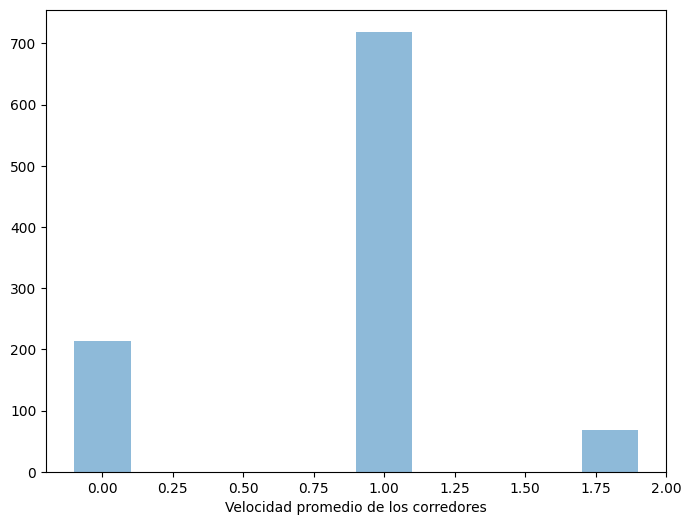

In [644]:
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.hist(dfCorrCorredores.Velocity,align='left',alpha=0.5)
ax1.set_xlabel('Velocidad promedio de los corredores')
